In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import Delaunay


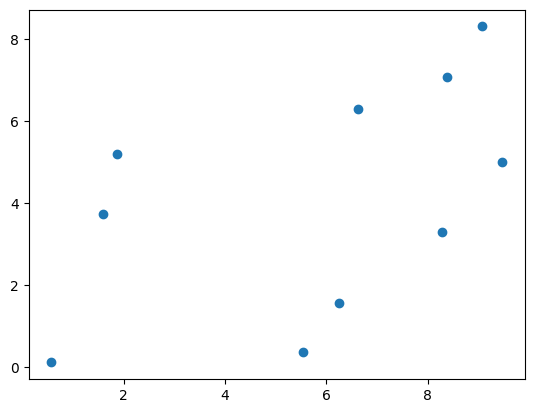

In [27]:
# Данные: точечные измерения высот
survey_points = np.random.uniform(size=(10, 2), low=0, high=10) # координаты
plt.scatter(x=survey_points.T[0], y=survey_points.T[1])


In [28]:
tri = Delaunay(survey_points)

In [29]:
def find_circumcircle(triangle_points):
    """
    Находит центр и радиус описанной окружности для треугольника
    """
    A, B, C = triangle_points
    a = np.linalg.norm(B - C)
    b = np.linalg.norm(A - C)
    c = np.linalg.norm(A - B)
    
    # Барицентрические координаты центра
    alpha = a**2 * (b**2 + c**2 - a**2)
    beta = b**2 * (a**2 + c**2 - b**2)
    gamma = c**2 * (a**2 + b**2 - c**2)
    
    total = alpha + beta + gamma
    center = (alpha * A + beta * B + gamma * C) / total
    
    radius = np.linalg.norm(A - center)
    
    return center, radius


In [33]:
def plot_delaunay_triangulation(points, tri, show_vertices=True, show_circumcircles=False):
    """
    Визуализация триангуляции Делоне
    """
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Рисуем треугольники
    ax.triplot(points[:, 0], points[:, 1], tri.simplices, 
               color='blue', linewidth=1, alpha=0.7, label='Треугольники')
    
    # Рисуем точки
    if show_vertices:
        ax.plot(points[:, 0], points[:, 1], 'o', 
                color='red', markersize=6, label='Точки')
    
    # Опционально: рисуем описанные окружности
    if show_circumcircles:
        for simplex in tri.simplices:
            # Находим центр и радиус описанной окружности
            triangle_points = points[simplex]
            center, radius = find_circumcircle(triangle_points)
            
            # Рисуем окружность
            circle = patches.Circle(center, radius, fill=False, 
                                  color='green', alpha=0.3, linewidth=0.8)
            ax.add_patch(circle)
    
    ax.set_xlabel('X координата')
    ax.set_ylabel('Y координата')
    ax.set_title('Триангуляция Делоне')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_aspect('equal')
    
    return fig, ax

In [34]:
survey_points[:, 0]

array([6.63315826, 8.38111973, 0.56402978, 9.08193934, 1.58797085,
       5.53096112, 6.25137549, 1.86053935, 8.2850647 , 9.47118081])

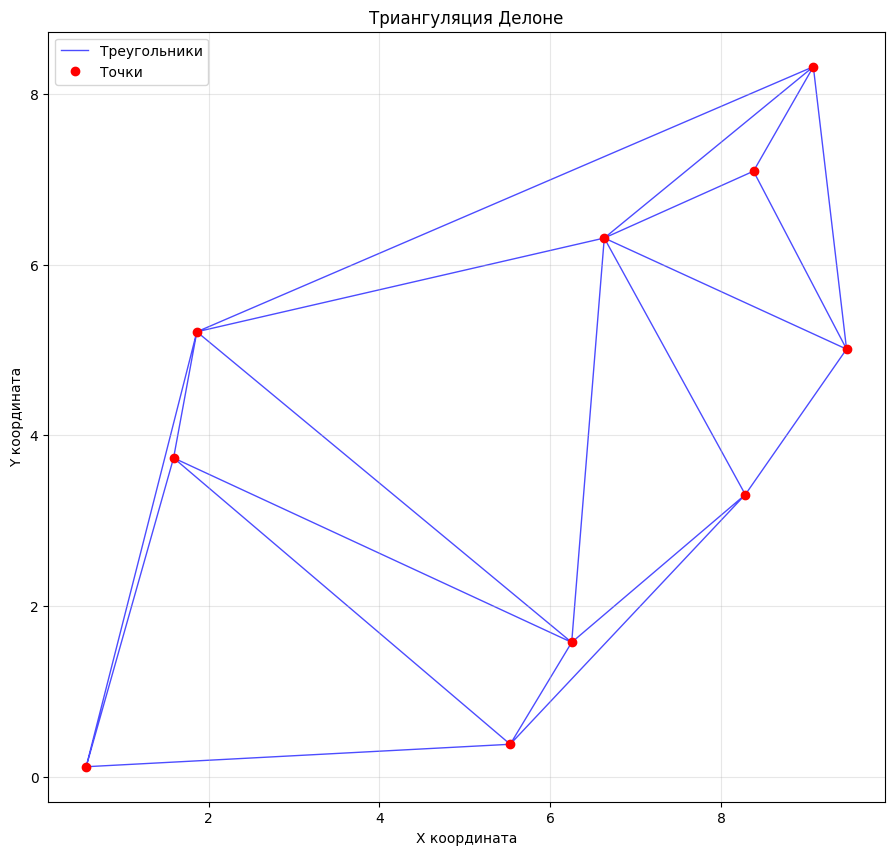

In [36]:
plot_delaunay_triangulation(survey_points[:, :2], tri, show_circumcircles=False)
plt.show()